## Decathlon Customer Behaviour Analysis for 2009-2011 dataset

Steps to follow:
- Combine data for all Years tab 1 , tab2
- Cleanse the data , flag error records for further Data Governance process
- Assumptions
- Exploratory Data Analysis
- Outcomes / Recommendations
    

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import time
import plotnine as pn

### Dataset Information

Shape: (1067371, 8) Column:1. InvoiceNo - Invoice number. Nominal. A 6-digit integral number uniquely assigned to
each transaction. If this code starts with the letter 'c', it indicates a cancellation
2. StockCode - Product (item) code. Nominal. A 5-digit integral number uniquely
assigned to each distinct produt.
3. Description - Product (item) name. Nomial.
4. Quantity - The quantities of each product (item) per transaction. Numric.
5. InvoiceDate - Invoice date and time. Numeric. The day and time when a transaction
was genrated.
6. UnitPrice - Unit price. Numeric. Product price per unit in sterlig (Â£).
7. CustomerID- Customer number. Nominal. A 5-digit integral number uniquely
assigned to each customer.
8. Country - Country name. Nominal. The name of the country where a customer
resides.

##### Combining File took around ~80 seconds, hence capturing the time here

In [9]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%A, %B %d, %Y %H:%M:%S")

print("Start of Program" , formatted_time)
start_time = time.time()

# Step 1: Load the dataset

# Define the file path
file_path = r'C:\Users\1000260277\Desktop\Adv Analytics\Case Study Decathlon\customer_transactions_sample.xlsx'

# Read data from both tabs
tab1_data = pd.read_excel(file_path, sheet_name='Year 2009-2010')
tab2_data = pd.read_excel(file_path, sheet_name='Year 2010-2011')

end_time = time.time()
elapsed_time = end_time - start_time

print("File read in " , round(elapsed_time, 2), "seconds\n")

# Define the file path for the Combined Data file
start_time = time.time()
csv_file_path = r'C:\Users\1000260277\Desktop\Adv Analytics\Case Study Decathlon\combined_data.csv'

# Concatenate data from both tabs
combined_data = pd.concat([tab1_data, tab2_data], ignore_index=True)

# Write the combined data to a CSV file
combined_data.to_csv(csv_file_path, index=False)

end_time = time.time()
elapsed_time = end_time - start_time

print("Combined file populated in " , round(elapsed_time, 2), "seconds\n")

# Display combined data
combined_data.head()

Start of Program Saturday, April 20, 2024 22:52:18
File read in  84.23 seconds

Combined file populated in  5.55 seconds



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Data Cleansing

- Remove Duplicates
- Capture Erreraneous records in Error Log file for further Data Governance
- Identify missing information
- Exclude Customer id is null records as this analysis mainly focuses on Customer Behaviour

In [12]:
#Count the duplicate rows
combined_data.duplicated().sum()

34335

In [14]:
# Identify and save duplicates to another CSV file
duplicates = combined_data[combined_data.duplicated(keep=False)].copy()  # Keep all duplicated rows

# Add flag columns
duplicates['Flag'] = 'Duplicate Rows'

# Write Errors to a new CSV file
err_log_file = r'C:\Users\1000260277\Desktop\Adv Analytics\Case Study Decathlon\err_log.csv'
duplicates.to_csv(err_log_file, index=False)

In [179]:
#Creating separate DF as a checkpoint
df=combined_data.copy()

#Remove space from column Names 
df.columns = df.columns.str.replace(' ', '') 

#Dropping Duplicates
df.drop_duplicates(inplace=True)  

# check the shape of the modified DataFrame
print("\nShape of DataFrame after dropping duplicates:", df.shape,"\n")

df.head()


Shape of DataFrame after dropping duplicates: (1033036, 8) 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [180]:
#Explore Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  datetime64[ns]
 5   Price        1033036 non-null  float64       
 6   CustomerID   797885 non-null   float64       
 7   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 70.9+ MB


In [181]:
# Check for missing records counts
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
CustomerID     235151
Country             0
dtype: int64

<Axes: >

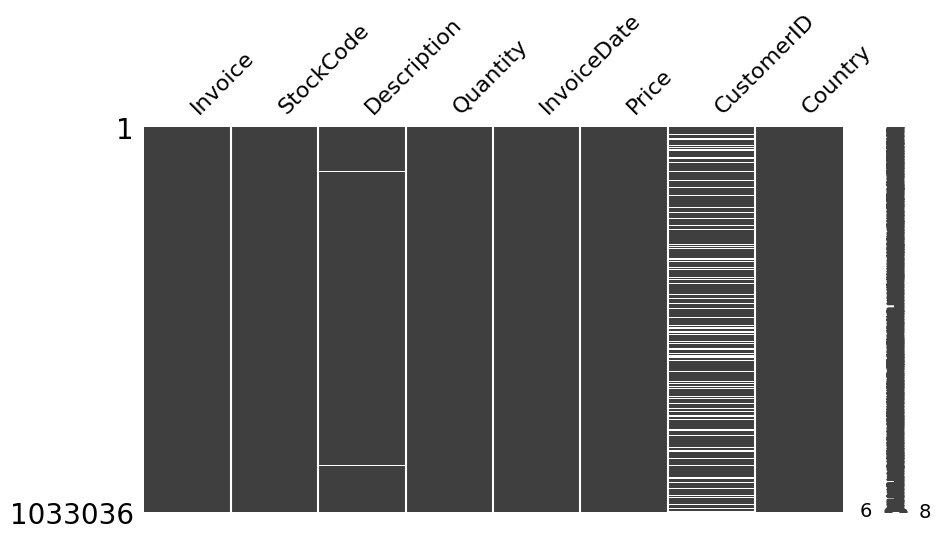

In [182]:
# Missing data detection
msno.matrix(df, figsize = (10,5))

<Axes: >

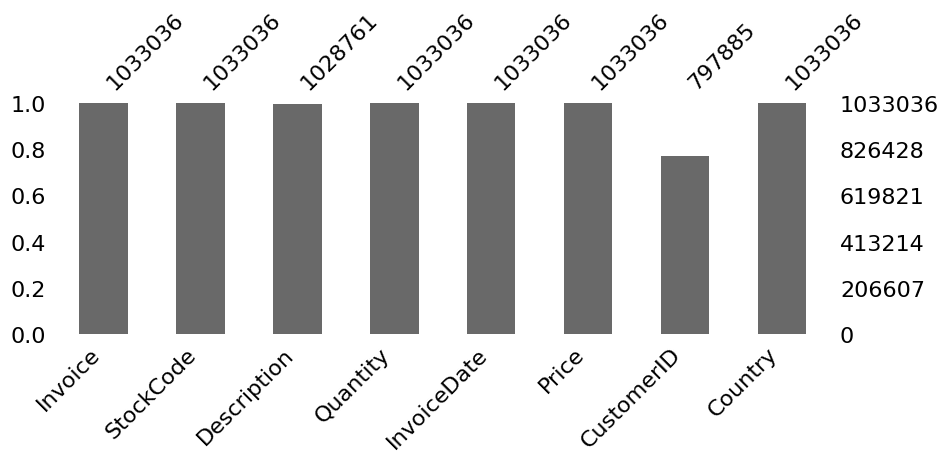

In [183]:
msno.bar(df,figsize = (10,3)) 

In [184]:
#Summary information on Dates like Min/Max InvoiceDate
df.describe()

,Quantity,InvoiceDate,Price,CustomerID
count,1.033036e+06,1033036,1.033036e+06,797885.000000
mean,1.007688e+01,2011-01-03 14:30:35.429549824,4.613980e+00,15313.062777
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-05 11:38:00,1.250000e+00,13964.000000
50%,3.000000e+00,2010-12-09 13:34:00,2.100000e+00,15228.000000
75%,1.000000e+01,2011-07-27 13:17:00,4.150000e+00,16788.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.751976e+02,NaN,1.223975e+02,1696.466663


In [80]:
#What are top 10 customers
#df['CustomerID'] = df['CustomerID'].astype(str)
#df.CustomerID.value_counts()[:10]

CustomerID
nan        235151
17841.0     12638
14911.0     11444
12748.0      6662
14606.0      6500
14096.0      5128
15311.0      4579
14156.0      4118
14646.0      3890
13089.0      3391
Name: count, dtype: int64

In [185]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,1033036,1033036,1028761,1033036
unique,53628,5305,5698,43
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,5653,5740,948321


In [186]:
df['Price'].value_counts().sort_index()

Price
-53594.36       1
-44031.79       1
-38925.87       1
-11062.06       2
 0.00        6014
             ... 
 16888.02       1
 17836.46       1
 18910.69       1
 25111.09       2
 38970.00       1
Name: count, Length: 2807, dtype: int64

In [187]:
# Condition where both 'Invoice' and 'CustomerID' are null
null_condition = df['Invoice'].isnull() & df['CustomerID'].isnull()
null_record_count = null_condition.sum()

print("Number of records where both 'Invoice' and 'CustomerID' are null:", null_record_count)

Number of records where both 'Invoice' and 'CustomerID' are null: 0


In [188]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,1033036,1033036,1028761,1033036
unique,53628,5305,5698,43
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,5653,5740,948321


In [189]:
#Exclude records with CustID null
nan_customerid_records = df[df['CustomerID'].isnull()]
nan_customerid_records['Flag'] = 'CustomerID is null'
nan_customerid_records.to_csv(err_log_file, mode='a', index=False, header=False)

nan_customerid_records.head()

print("\nNumber of records before dropping CustID null records:", df.shape)
print("\nNumber of records with CustID null:",nan_customerid_records.shape)

df = df.dropna(subset=['CustomerID'])

print("\nNumber of records after dropping CustID null records:", df.shape)

C:\Users\1000260277\AppData\Local\Temp\ipykernel_25768\1613852835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of records before dropping CustID null records: (1033036, 8)

Number of records with CustID null: (235151, 9)

Number of records after dropping CustID null records: (797885, 8)


In [190]:
df['Price'].value_counts().sort_index()

Price
0.000        70
0.001        18
0.010         2
0.030         6
0.040        67
             ..
8985.600      2
10468.800     3
10953.500     3
25111.090     1
38970.000     1
Name: count, Length: 1022, dtype: int64

In [191]:
#Exclude records with Price=0 if exist as they dont contribute to any Sales/Revenue
(df['Price'] == 0).sum()

70

### Write the data back to csv for further tableau analysis 

In [192]:
file_path = r'C:\Users\1000260277\Desktop\Adv Analytics\Case Study Decathlon\Customer_data0421.csv'

df.to_csv(file_path, index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\1000260277\\Desktop\\Adv Analytics\\Case Study Decathlon\\Customer_data0421.csv'

In [109]:
#Invalid stock Codes

invalid_stockcode = df[(df['StockCode'].str.len() < 5) | (df['StockCode'].str.len() > 7)]
invalid_stockcode['Flag'] = 'Invalid Stock Code'
invalid_stockcode.to_csv(err_log_file, mode='a', index=False, header=False)

invalid_stockcode.shape

C:\Users\1000260277\AppData\Local\Temp\ipykernel_25768\614763310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalid_stockcode['Flag'] = 'Invalid Stock Code'


(3572, 9)

In [193]:
df = df.drop(invalid_stockcode.index)

In [194]:
df.shape

(794313, 8)

In [195]:
#Exclude records with Invoice null
nan_Invoice_records = df[df['Invoice'].isnull()]
nan_Invoice_records['Flag'] = 'Invoice is null'
nan_Invoice_records.to_csv(err_log_file, mode='a', index=False, header=False)

nan_Invoice_records.head()

print("\nNumber of records before dropping Invoice null records:", df.shape)
print("\nNumber of records with Invoice null:",nan_Invoice_records.shape)

df = df.dropna(subset=['Invoice'])

print("\nNumber of records after dropping Invoice null records:", df.shape)


Number of records before dropping Invoice null records: (794313, 8)

Number of records with Invoice null: (0, 9)

Number of records after dropping Invoice null records: (794313, 8)


In [196]:
#master table creation

# Select distinct values from 'StockCode' and 'Description'
df_prod_master = df[['StockCode', 'Description']]

df_prod_master = df_prod_master.drop_duplicates()

# Pick just 1 latest description for every StockCode
df_prod_master = df_prod_master.groupby('StockCode').agg({'Description': 'last'}).reset_index()

# Display the DataFrame
print(df_prod_master.head())

  StockCode                  Description
0     10002  INFLATABLE POLITICAL GLOBE 
1     10080     GROOVY CACTUS INFLATABLE
2     10109         BENDY COLOUR PENCILS
3     10120                 DOGGY RUBBER
4     10125      MINI FUNKY DESIGN TAPES


In [197]:
# Drop Description from Fact data 

df_fact = df.drop(["Description"], axis=1)
df_fact.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [198]:
# Join fact and Master data based on StockCode Field
df_fact = pd.merge(df_fact, df_prod_master, on='StockCode', how='inner')

# Display the merged DataFrame
df_fact.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET POT


In [199]:
file_path = r'C:\Users\1000260277\Desktop\Adv Analytics\Case Study Decathlon\Customer_data042104.csv'

df_fact.to_csv(file_path, index=False)

In [200]:
df_first_purchase_Tbl=df_fact.sort_values(['CustomerID','InvoiceDate']).groupby('CustomerID').first()

In [201]:
#Add Total Sales value 
df_fact['TotalSales'] = df_fact['Quantity'] * df_fact['Price']

In [202]:
df_fact.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,TotalSales
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET POT,30.0


<Axes: xlabel='InvoiceDate'>

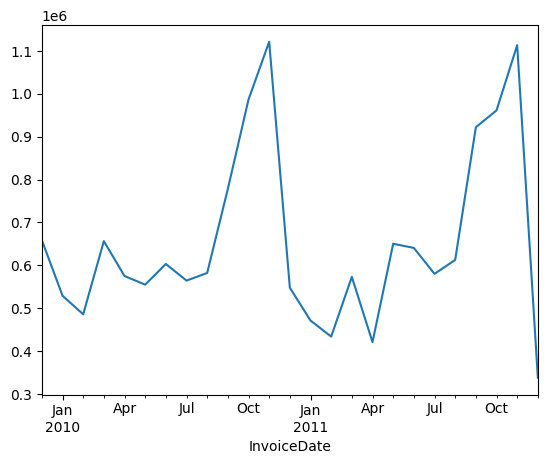

In [203]:
#Visualizing All purchases within Cohort
df_fact.reset_index().set_index('InvoiceDate')['TotalSales'].resample(rule="MS").sum().plot()

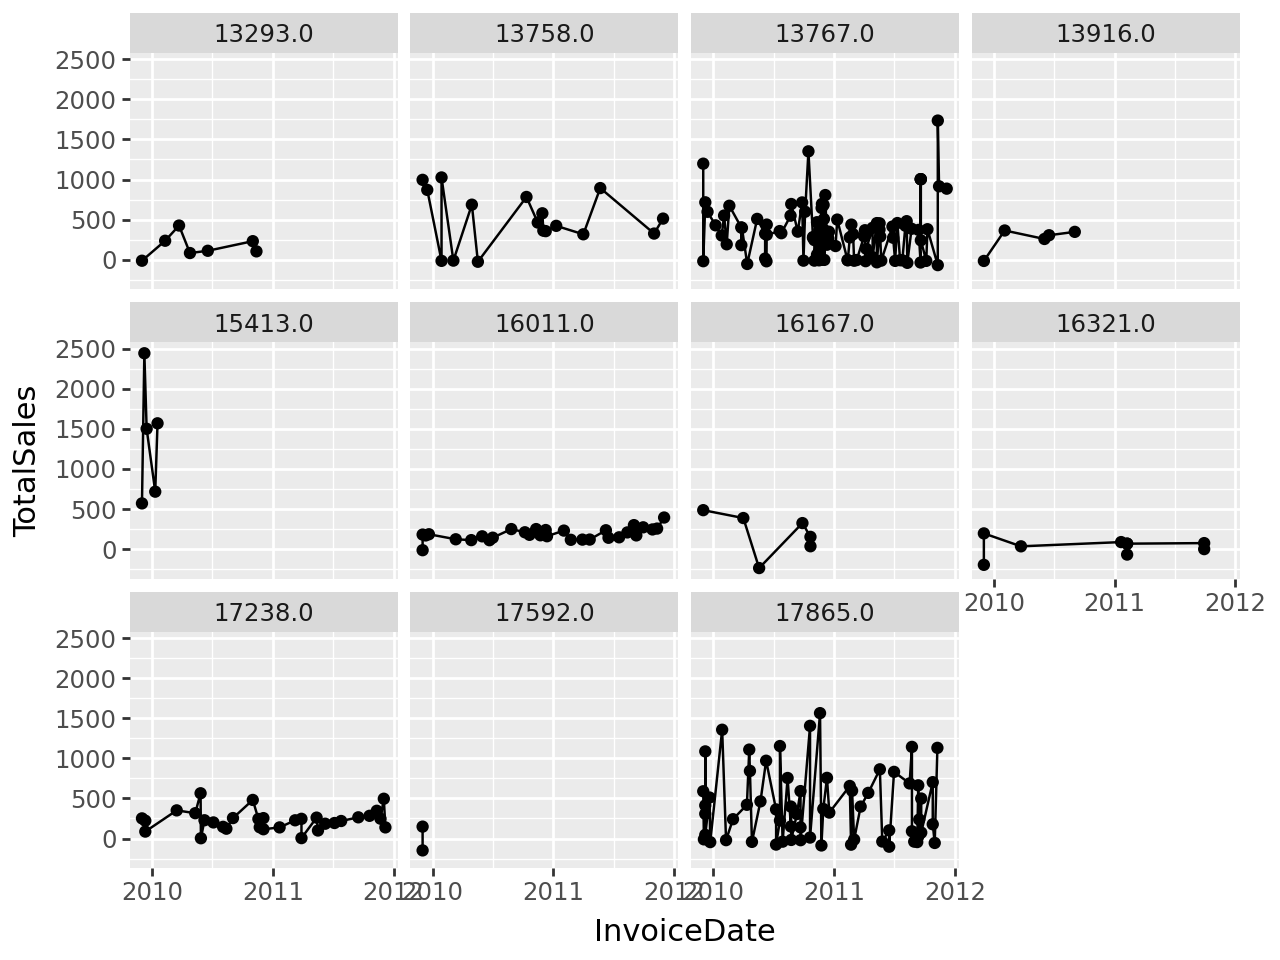

In [207]:
#Visualize Individual Customer Purchases
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, scale_x_date
ids = df_fact['CustomerID'].unique()
ids_selected = ids[9:20]

df_cust_subset = df_fact[df_fact['CustomerID'].isin(ids_selected)].groupby(['CustomerID','InvoiceDate']).sum(['Quantity','TotalSales']).reset_index()

(
    ggplot(df_cust_subset, aes(x='InvoiceDate', y='TotalSales', group='CustomerID'))  # Pass data and aesthetics
    + geom_line()  # Draw lines
    + geom_point()  # Add points
    + facet_wrap('~CustomerID')  # Facet by CustomerID
    + scale_x_date(date_breaks="1 year", date_labels="%Y")  # Set x-axis date scale
)

In [208]:
#What will the customers spend in next 90-days ? (Regression)
#What is the probability of a customer to make another purchase in next 90-days ?

#Step1:
n_days=90
max_date=df['InvoiceDate'].max()
print("max_date:",max_date)
cutoff_date=max_date - pd.to_timedelta(n_days,unit="d")
print("cutoff_date:",cutoff_date)

max_date: 2011-12-09 12:50:00
cutoff_date: 2011-09-10 12:50:00


In [209]:
#Subset1 in cutoff_date
date_in_df = df_fact[df_fact['InvoiceDate']<=cutoff_date]
date_in_df

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,TotalSales
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET POT,30.00
...,...,...,...,...,...,...,...,...,...
633002,566220,22989,24,2011-09-09 15:53:00,3.25,15251.0,United Kingdom,SET 2 PANTRY DESIGN TEA TOWELS,78.00
633003,566220,22980,48,2011-09-09 15:53:00,1.45,15251.0,United Kingdom,PANTRY SCRUBBING BRUSH,69.60
633004,566220,22622,6,2011-09-09 15:53:00,11.95,15251.0,United Kingdom,BOX OF VINTAGE ALPHABET BLOCKS,71.70
633005,C566222,23118,-1,2011-09-09 16:34:00,7.50,13458.0,United Kingdom,PARISIENNE JEWELLERY DRAWER,-7.50


In [210]:
#Subset2 Out of cutoff_date
date_out_df = df_fact[df_fact['InvoiceDate']>cutoff_date]
date_out_df

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,TotalSales
633007,566225,22384,6,2011-09-11 10:35:00,1.65,16899.0,United Kingdom,LUNCH BAG PINK POLKADOTS,9.90
633008,566225,20725,6,2011-09-11 10:35:00,1.65,16899.0,United Kingdom,LUNCH BAG RED RETROSPOT,9.90
633009,566225,23169,3,2011-09-11 10:35:00,4.15,16899.0,United Kingdom,CLASSIC GLASS COOKIE JAR,12.45
633010,566225,84029E,3,2011-09-11 10:35:00,4.25,16899.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,12.75
633011,566225,21479,3,2011-09-11 10:35:00,4.25,16899.0,United Kingdom,WHITE SKULL HOT WATER BOTTLE,12.75
...,...,...,...,...,...,...,...,...,...
794308,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,10.20
794309,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,12.60
794310,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,KIDS CUTLERY DOLLY GIRL,16.60
794311,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,16.60


In [211]:
date_out_df = date_out_df[['CustomerID', 'TotalSales','Quantity']]
target_df=date_out_df.drop('Quantity',axis=1).groupby('CustomerID').sum().rename({'TotalSales' : 'Spend_90_days'},axis=1).assign(Spend_90_flag = 1 )
target_df

,Spend_90_days,Spend_90_flag
CustomerID,,
12347.0,1519.14,1
12348.0,270.00,1
12349.0,1457.55,1
12352.0,744.23,1
12356.0,58.35,1
...,...,...
18277.0,110.38,1
18278.0,173.90,1
18282.0,77.84,1


C:\Users\1000260277\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


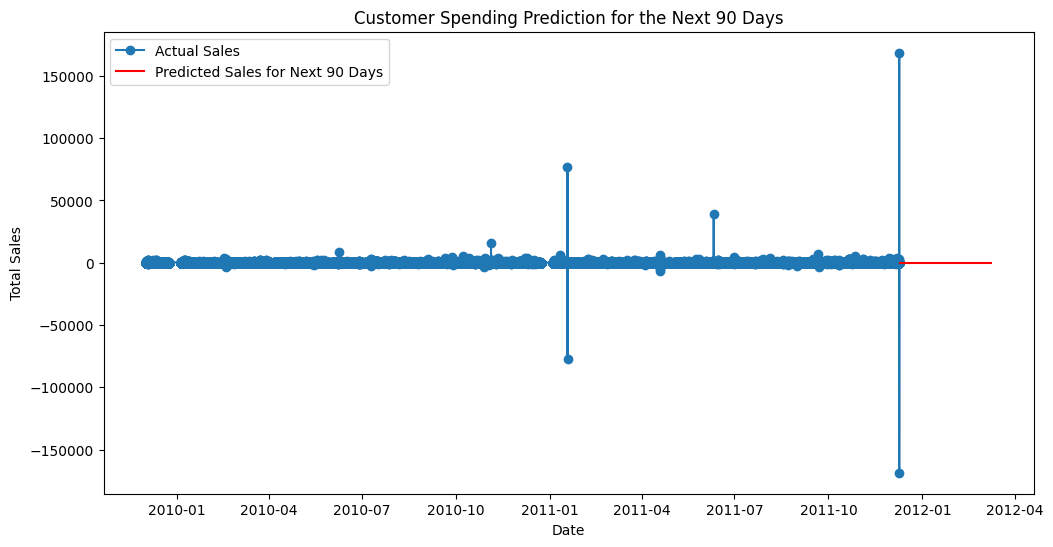

In [227]:
#What will the customers spend in next 90-days ? (Regression)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#df_cd = pd.DataFrame(df_fact)
#df_cd = df_fact[~df_fact['Invoice'].astype(str).str.startswith('C')].copy()
df_cd=pd.DataFrame(df_fact)

# Convert 'InvoiceDate' to numerical representation (days since first date)
df_cd['DaysSinceStart'] = (df_cd['InvoiceDate'] - df_cd['InvoiceDate'].min()).dt.days

# Define features (X) and target (y)
X = df_cd[['DaysSinceStart']]  # Features for regression
y = df_cd['TotalSales']  # Target variable (total sales)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the next 90 days
#future_days = np.array([df_cd['DaysSinceStart'].max() + i for i in range(1, 91)]).reshape(-1, 1)
future_predictions = model.predict(future_days)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df_cd['InvoiceDate'], df_cd['TotalSales'], 'o-', label='Actual Sales')
plt.plot(
    [df_cd['InvoiceDate'].max() + pd.DateOffset(days=i) for i in range(1, 91)],
    future_predictions,
    'r-',
    label='Predicted Sales for Next 90 Days'
)
plt.title("Customer Spending Prediction for the Next 90 Days")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

In [220]:
df_cd.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,TotalSales,DaysSinceStart
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,81.0,0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,81.0,0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",100.8,0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET POT,30.0,0


C:\Users\1000260277\AppData\Local\Temp\ipykernel_25768\3230936059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\1000260277\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


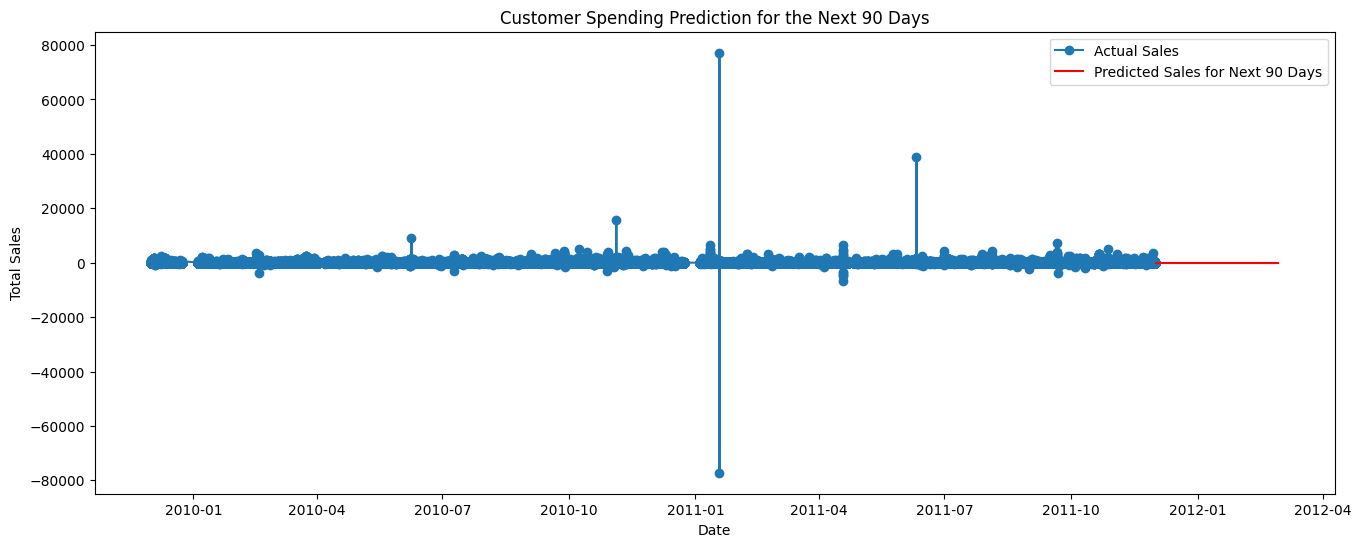

In [228]:
#Ignore last month here 

# Determine the latest month in the 'InvoiceDate' column
latest_month = df_cd['InvoiceDate'].dt.to_period('M').max()

# Exclude records from the latest month
df_cd2 = df_cd[df_cd['InvoiceDate'].dt.to_period('M') != latest_month]

# Convert 'InvoiceDate' to numerical representation (days since first date)
df_cd2['DaysSinceStart'] = (df_cd2['InvoiceDate'] - df_cd2['InvoiceDate'].min()).dt.days

# Define features (X) and target (y)
X = df_cd2[['DaysSinceStart']]  # Features for regression
y = df_cd2['TotalSales']  # Target variable (total sales)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for the next 90 days
#future_days = np.array([df_cd['DaysSinceStart'].max() + i for i in range(1, 91)]).reshape(-1, 1)
future_predictions = model.predict(future_days)

# Plotting the results
plt.figure(figsize=(16, 6))
plt.plot(df_cd2['InvoiceDate'], df_cd2['TotalSales'], 'o-', label='Actual Sales')
plt.plot(
    [df_cd2['InvoiceDate'].max() + pd.DateOffset(days=i) for i in range(1, 91)],
    future_predictions,
    'r-',
    label='Predicted Sales for Next 90 Days'
)
plt.title("Customer Spending Prediction for the Next 90 Days")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

C:\Users\1000260277\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


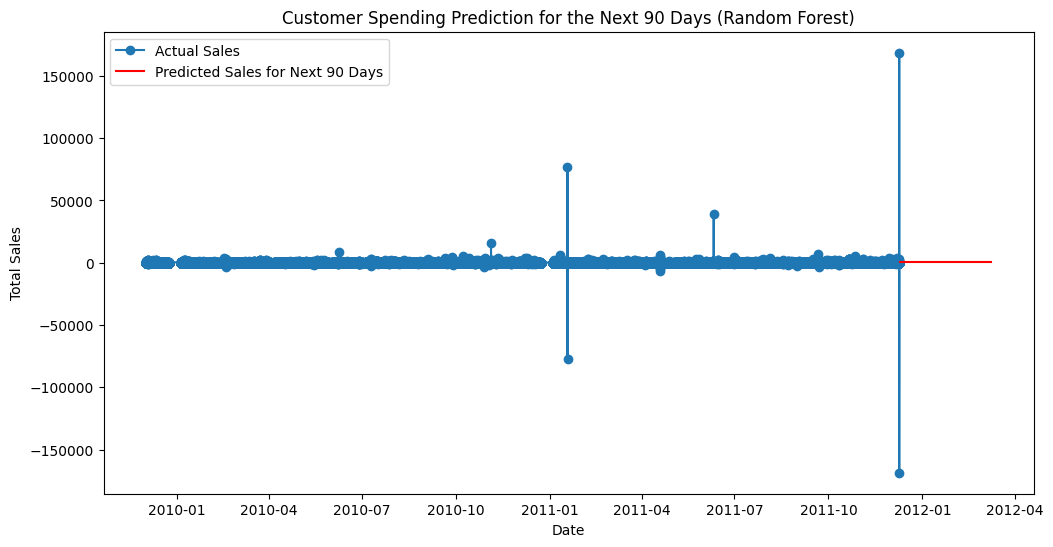

Mean Absolute Error (MAE) for Test Data: 21.69407676142454


In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df_cd = pd.DataFrame(df_fact)
#df_cd = df_fact[~df_fact['Invoice'].astype(str).str.startswith('C')].copy()

# Convert 'InvoiceDate' to numerical representation (days since first date)
df_cd['DaysSinceStart'] = (df_cd['InvoiceDate'] - df_cd['InvoiceDate'].min()).dt.days

# Define features (X) and target (y)
X = df_cd[['DaysSinceStart']]  # Features for regression
y = df_cd['TotalSales']  # Target variable (total sales)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
model.fit(X_train, y_train)

# Predict future sales for the next 90 days
future_days = np.array([df_cd['DaysSinceStart'].max() + i for i in range(1, 91)]).reshape(-1, 1)
future_predictions = model.predict(future_days)

# Plotting actual and predicted sales
plt.figure(figsize=(12, 6))
plt.plot(df_cd['InvoiceDate'], df_cd['TotalSales'], 'o-', label='Actual Sales')
plt.plot(
    [df_cd['InvoiceDate'].max() + pd.DateOffset(days=i) for i in range(1, 91)],
    future_predictions,
    'r-',
    label='Predicted Sales for Next 90 Days'
)
plt.title("Customer Spending Prediction for the Next 90 Days (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

# Calculate error metrics (optional)
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Mean Absolute Error (MAE) for Test Data:", mae)

C:\Users\1000260277\AppData\Local\Temp\ipykernel_25768\261938153.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



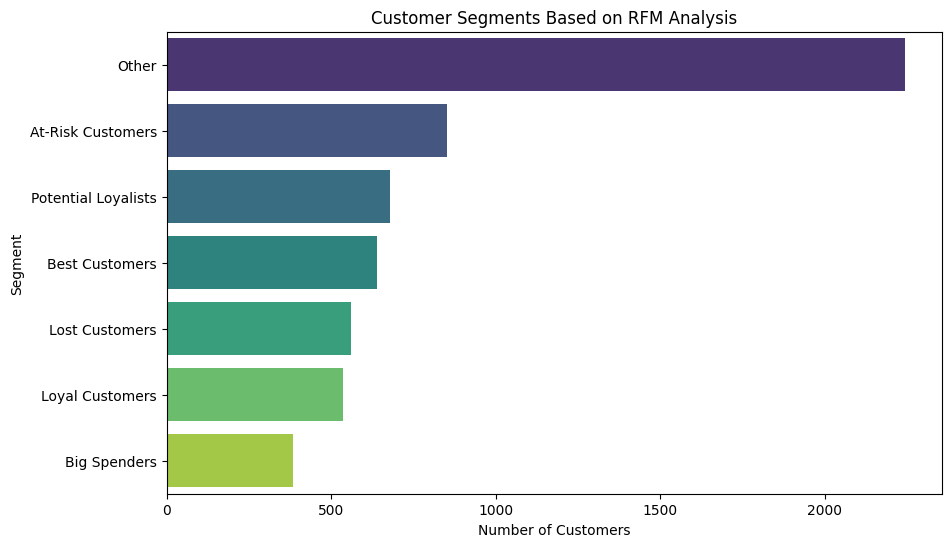

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Sample data preparation
# Assuming 'df_fact' contains customer transactions with 'InvoiceDate', 'CustomerID', 'TotalSales', etc.

# Set the analysis date (end of the observation period)
analysis_date = df_fact['InvoiceDate'].max() + pd.DateOffset(days=1)  # Day after the last purchase

# Recency: Calculate the number of days since the last purchase for each customer
recency_df = df_fact.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (analysis_date - recency_df['InvoiceDate']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]  # Keep only relevant columns

# Frequency: Count the number of transactions for each customer
frequency_df = df_fact.groupby('CustomerID')['Invoice'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Monetary: Calculate the total monetary value for each customer
monetary_df = df_fact.groupby('CustomerID')['TotalSales'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Combine Recency, Frequency, and Monetary into one data frame
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Calculate RFM quartiles to rank customers (lower recency is better, higher frequency and monetary are better)
recency_quartiles = rfm_df['Recency'].quantile([0.25, 0.5, 0.75])
frequency_quartiles = rfm_df['Frequency'].quantile([0.25, 0.5, 0.75])
monetary_quartiles = rfm_df['Monetary'].quantile([0.25, 0.5, 0.75])

def assign_rfm_score(value, quartiles, ascending=True):
    """Assign a score based on quartiles (1-4, with 1 being the best for Recency and 4 for Frequency/Monetary)."""
    if ascending:
        if value <= quartiles[0.25]:
            return 1
        elif value <= quartiles[0.5]:
            return 2
        elif value <= quartiles[0.75]:
            return 3
        else:
            return 4
    else:
        if value >= quartiles[0.75]:
            return 1
        elif value >= quartiles[0.5]:
            return 2
        elif value >= quartiles[0.25]:
            return 3
        else:
            return 4

# Assign RFM scores
rfm_df['R_Score'] = rfm_df['Recency'].apply(lambda x: assign_rfm_score(x, recency_quartiles))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(lambda x: assign_rfm_score(x, frequency_quartiles, ascending=False))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(lambda x: assign_rfm_score(x, monetary_quartiles, ascending=False))

# Combine R, F, and M scores to create a complete RFM score (as strings)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].astype(str).agg(''.join, axis=1)

# Segment customers based on RFM scores
def segment_rfm(rfm_score):
    """Assign customer segments based on RFM scores."""
    if rfm_score == '111':
        return 'Best Customers'
    elif rfm_score in ['112', '121', '211']:
        return 'Loyal Customers'
    elif rfm_score == '444':
        return 'Lost Customers'
    elif rfm_score.startswith('1'):
        return 'Potential Loyalists'
    elif rfm_score.endswith('1'):
        return 'Big Spenders'
    elif rfm_score.startswith('4'):
        return 'At-Risk Customers'
    else:
        return 'Other'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(segment_rfm)

# Visualize segments with a bar plot
segment_counts = rfm_df['Segment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis')
plt.title("Customer Segments Based on RFM Analysis")
plt.xlabel("Number of Customers")
plt.ylabel("Segment")
plt.show()

In [231]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346.0,326,37,264.86,3,3,4,334,Other
1,12347.0,2,222,4921.53,1,1,1,111,Best Customers
2,12348.0,75,46,1658.40,2,3,2,232,Other
3,12349.0,19,177,3654.54,1,1,1,111,Best Customers
4,12350.0,310,16,294.40,3,4,4,344,Other


In [233]:
# Join fact and Master data based on StockCode Field
df_fact = pd.merge(df_fact, rfm_df, on='CustomerID', how='inner')

# Display the merged DataFrame
df_fact.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,TotalSales,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4,158,91,2289.58,3,2,1,321,Big Spenders
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS,81.0,158,91,2289.58,3,2,1,321,Big Spenders
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS,81.0,158,91,2289.58,3,2,1,321,Big Spenders
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",100.8,158,91,2289.58,3,2,1,321,Big Spenders
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET POT,30.0,158,91,2289.58,3,2,1,321,Big Spenders


In [234]:
file_path = r'C:\Users\1000260277\Desktop\Adv Analytics\Case Study Decathlon\Customer_data042104.csv'

df_fact.to_csv(file_path, index=False)